In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Loading the Data

In [2]:
#reading the excel file and converting it to DataFrame
df = pd.read_excel('customer_retention_dataset.xlsx')
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


# EDA

In [3]:
#Finding the shape of the DataFrame
df.shape

(269, 71)

- we have 269 rows and 71 columns

In [4]:
#finding what are all the columns present in DF
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

#### As we have spaces in teh column name we are going to remove it

In [5]:
df.columns = df.columns.str.rstrip()

In [7]:
#finding the data types of the each column
df.dtypes

1Gender of respondent                                                   object
2 How old are you?                                                      object
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                              object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [8]:
#getting the concise summary of the dataframe using df.info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                        --------------  ----- 
 0   1Gender of respondent                                                                                         269 non-null    object
 1   2 How old are you?                                                                                            269 non-null    object
 2   3 Which city do you shop online from?                                                                         269 non-null    object
 3   4 What is the Pin Code of where you shop online from?                                                         269 non-null    int64 
 4   5 Since How Long You are Shopping Online ?                    

- In total 71 columns one is int type and remaining all are object type
- That means all are of categeorical type

In [9]:
#Finding the null values count by using df.isnull().sum(), although we got clarity in the info method,lets check by getting the sum
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

<AxesSubplot:>

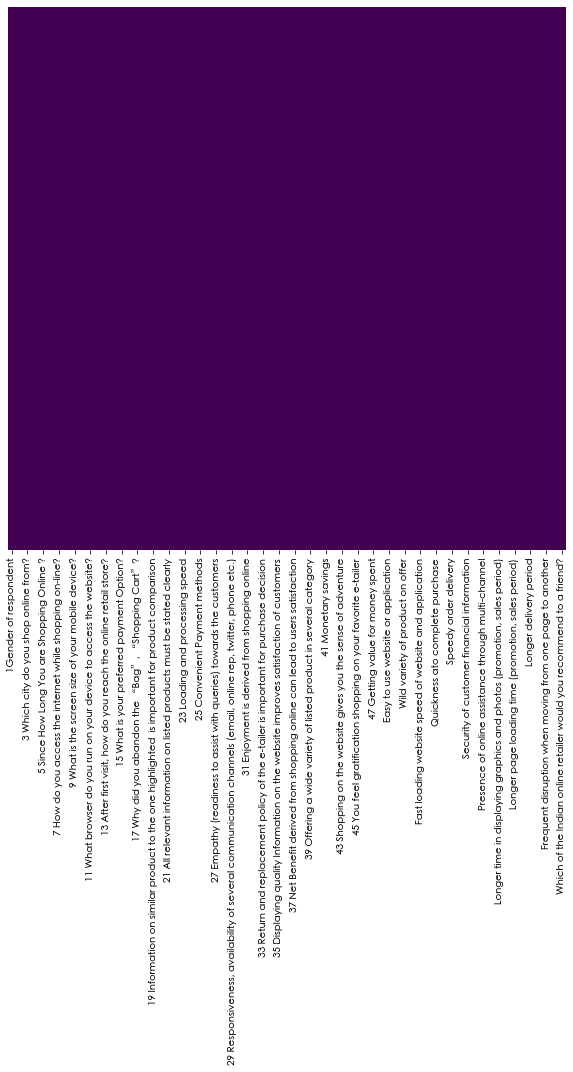

Executing shutdown due to inactivity...


2022-05-10 11:59:43,846 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-05-10 11:59:43,892 - INFO     - Executing shutdown...


In [54]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

- we can see that there are no null values in the dataset

In [11]:
#checking for categeorical columns
features_list = []
for feature_type in df.dtypes.index:
    if df.dtypes[feature_type]=='object':
        features_list.append(feature_type)
features_list

['1Gender of respondent',
 '2 How old are you?',
 '3 Which city do you shop online from?',
 '5 Since How Long You are Shopping Online ?',
 '6 How many times you have made an online purchase in the past 1 year?',
 '7 How do you access the internet while shopping on-line?',
 '8 Which device do you use to access the online shopping?',
 '9 What is the screen size of your mobile device?',
 '10 What is the operating system (OS) of your device?',
 '11 What browser do you run on your device to access the website?',
 '12 Which channel did you follow to arrive at your favorite online store for the first time?',
 '13 After first visit, how do you reach the online retail store?',
 '14 How much time do you explore the e- retail store before making a purchase decision?',
 '15 What is your preferred payment Option?',
 '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?',
 '17 Why did you abandon the “Bag”, “Shopping Cart”?',
 '18 The content o

In [12]:
print(len(features_list))

70


- we have count of 70 categeorical variabels 

In [13]:
for feature in features_list:
    print(feature)
    print(df[feature].value_counts())
    print('--------------------------------------')

1Gender of respondent
Female    181
Male       88
Name: 1Gender of respondent, dtype: int64
--------------------------------------
2 How old are you?
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you?, dtype: int64
--------------------------------------
3 Which city do you shop online from?
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64
--------------------------------------
5 Since How Long You are Shopping Online ?
Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: 5 Since How Long You are Shopping Online ?, dtype: int64
--------------------------------------
6 How many times you have made a

<AxesSubplot:xlabel='1Gender of respondent', ylabel='count'>

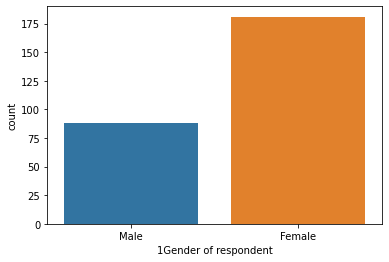

In [14]:
sns.countplot(df['1Gender of respondent'])

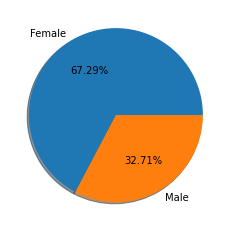

In [15]:
labels = 'Female','Male'
fig, ax = plt.subplots()
ax.pie(df['1Gender of respondent'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

- In the dataset the female's are more in the dataset
    * Male:88
    * Female:181
- 32.71% is of Male

<AxesSubplot:xlabel='2 How old are you?', ylabel='count'>

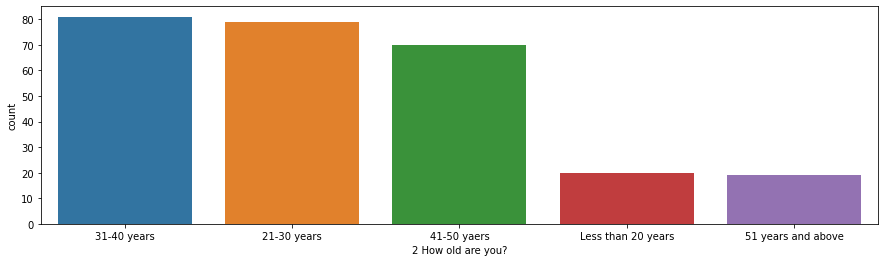

In [16]:
plt.figure(figsize=(15,4),facecolor='white')
sns.countplot(df['2 How old are you?'])

* 31-40 and 21-30 years people are more active in online shopping
* 51 years+ and below 20 years aged people are not active in online shopping
* 41-50 years people are moderately active

<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='count'>

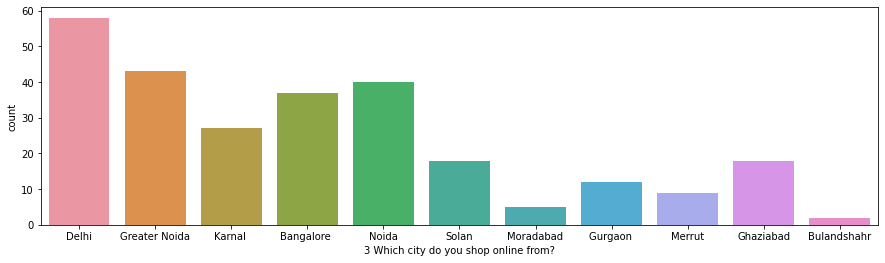

In [17]:
plt.figure(figsize=(15,4),facecolor='white')
sns.countplot(df['3 Which city do you shop online from?'])

- Delhi based location are highly active in online shopping
- Bulandshahr location people are not active
- Priority based on location who are active in online shoping is like:
    * Delhi            58
    * Greater Noida    43
    * Noida            40
    * Bangalore        37
    * Karnal           27
    * Solan            18
    * Ghaziabad        18
    * Gurgaon          12
    * Merrut            9
    * Moradabad         5
    * Bulandshahr       2

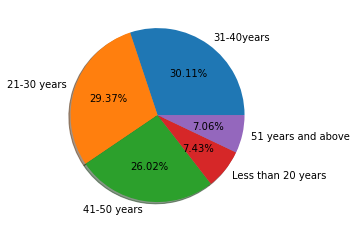

In [18]:
labels = '31-40years','21-30 years','41-50 years','Less than 20 years','51 years and above'
fig, ax = plt.subplots()
ax.pie(df['2 How old are you?'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

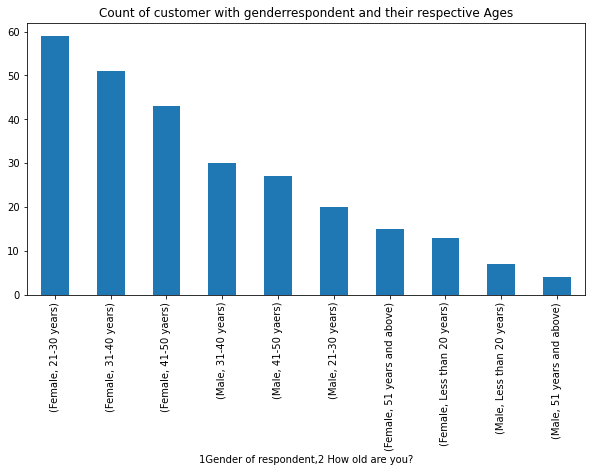

In [19]:
fig=plt.figure(figsize=(10,5))
df[['1Gender of respondent',""'2 How old are you?']].value_counts().plot(kind='bar')
plt.title("Count of customer with gender respondent and their respective Ages")
plt.show()

- Female Customer of 21-30years old are using online shopping more than any others.

##### Comaprsion of shopping based on city,age

<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='count'>

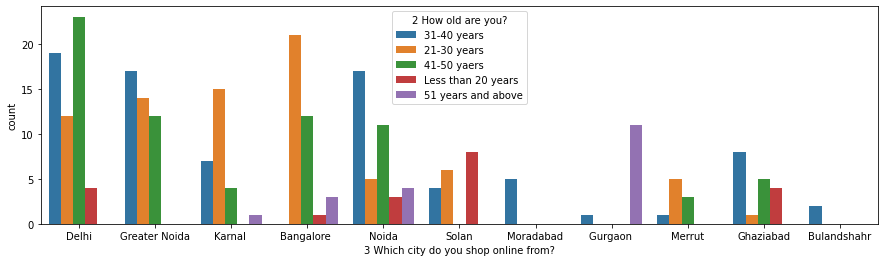

In [20]:
plt.figure(figsize=(15,4),facecolor='white')
sns.countplot(df['3 Which city do you shop online from?'], hue=df['2 How old are you?'])

##### Comaprsion of shopping based on city,gender 

<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='count'>

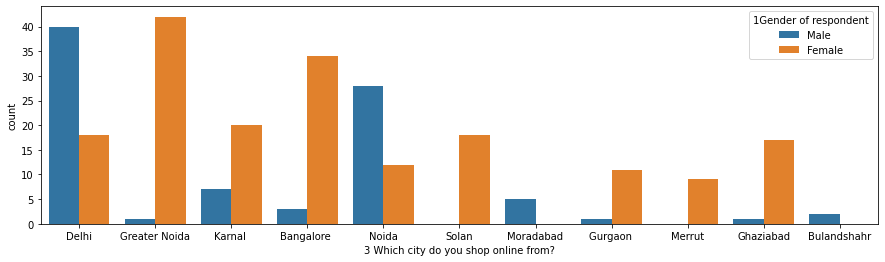

In [21]:
plt.figure(figsize=(15,4),facecolor='white')
sns.countplot(df['3 Which city do you shop online from?'], hue=df['1Gender of respondent'])

- Lets go through the comaparision. of location and aged people who are involved in shopping
- Delhi:
    * mostly 41-50 years aged people shop online 
    * less than 20 aged are not much active in shopping
    * 31-40 and 21-30 are moderatly active
- Greater Noida:
    * There is no 'less than 20 years' and '51 years and above' aged people involved in online shopping.
    * 31-40 years aged are more active
    * 41-50 years aged are less active
    * 21-30 years aged are moderatly involved in online shopping
- Kamal:
    * There is no 'less than 20 years' aged people involved in online shopping.
    * 21-30 years aged people are more active
    * 31-40 and 41-50 are moderatly involved in shopping.
    * 51 years above are less involved here
- Bangalore:
    * 21-30 aged are highly active.
    * less than 20 years are least active. 
    * 41-50 are moderatly active.
    * 51 years and above are slightly active in online shopping.
- Noida:
    * 31-40 years are highly active.
    * 'less than 20 years' and '21-30' are least active. 
    * 41-50 are moderatly active.
- Solan:
    * less than 20 years are highly active.
    * 31-40 years are least active in online shopping.
    * 21-30 are moderatly active
- Moradabad:
    * Only 31-40 years people are active in online shopping
- Gurgaon:
    * 51 years and above are highly active 
    * 31-40 are least active
- Merut:
    * Compared to other states here 31-50 years in-between aged people are moderatly active
- Ghaziabad:
    * Compared to other states here except 50 years and above aged all the other aged people are moderatly active
- Bulandshahr:
    * only some amount of people of aged 31-40 are active here.

<AxesSubplot:xlabel='5 Since How Long You are Shopping Online ?', ylabel='count'>

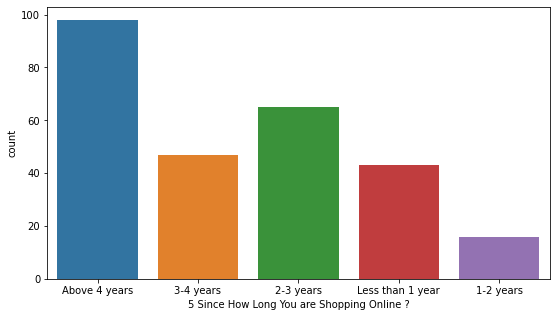

In [22]:
plt.figure(figsize=(9,5),facecolor='white')
sns.countplot(df['5 Since How Long You are Shopping Online ?'])

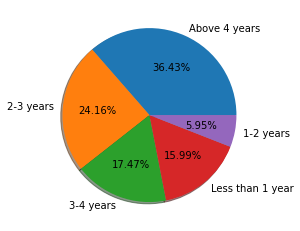

In [23]:
labels = 'Above 4 years','2-3 years','3-4 years','Less than 1 year','1-2 years'
fig, ax = plt.subplots()
ax.pie(df['5 Since How Long You are Shopping Online ?'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

- In the whole data the people who are shopping from more than 4 years are more(36.43%)
- The people who are shopping from 1-2 years are less in the data(i.e 5.95%)
- 24.16% of 2-3 years people are shopping online
- 17.47% of 3-4 years people are shopping online
- 15.99% of less than 1 year people are shopping online

<AxesSubplot:xlabel='6 How many times you have made an online purchase in the past 1 year?', ylabel='count'>

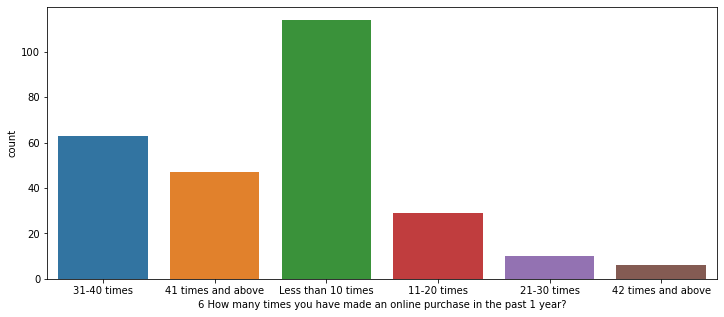

In [24]:
plt.figure(figsize=(12,5),facecolor='white')
sns.countplot(df['6 How many times you have made an online purchase in the past 1 year?'])

<AxesSubplot:xlabel='6 How many times you have made an online purchase in the past 1 year?', ylabel='count'>

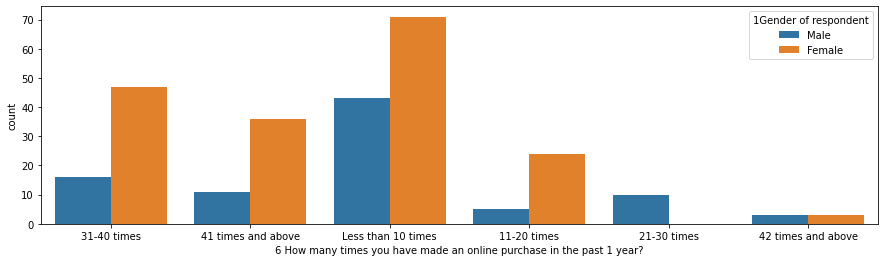

In [25]:
plt.figure(figsize=(15,4),facecolor='white')
sns.countplot(df['6 How many times you have made an online purchase in the past 1 year?'], hue=df['1Gender of respondent'])

<AxesSubplot:xlabel='7 How do you access the internet while shopping on-line?', ylabel='count'>

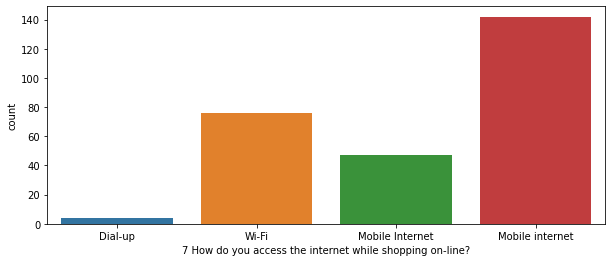

In [26]:
plt.figure(figsize=(10,4),facecolor='white')
sns.countplot(df['7 How do you access the internet while shopping on-line?'])

- as we have 2 different names with same feature lets rename them to one of them

In [27]:
df['7 How do you access the internet while shopping on-line?']=df['7 How do you access the internet while shopping on-line?'].replace({'Mobile internet':'Mobile Internet'})

<AxesSubplot:xlabel='7 How do you access the internet while shopping on-line?', ylabel='count'>

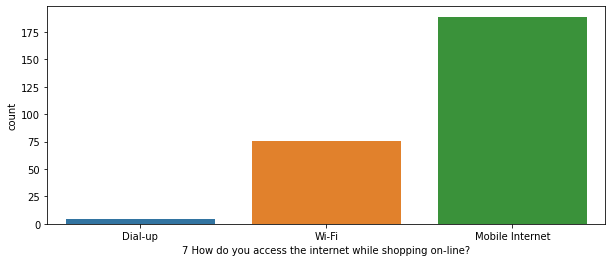

In [28]:
plt.figure(figsize=(10,4),facecolor='white')
sns.countplot(df['7 How do you access the internet while shopping on-line?'])

- Mobile internet users are more while online shopping
- Users are using Wi-Fi Moderatly while shopping
- Users are using Dial-up very very less for shopping

<AxesSubplot:xlabel='8 Which device do you use to access the online shopping?', ylabel='count'>

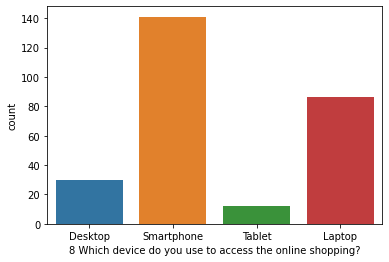

In [29]:
sns.countplot(df['8 Which device do you use to access the online shopping?'])

- Users are using smartphone more while shopping
- Tablets are used very less
- Laptop are used moderatly

#### Comparison of acess of online shopping with help of mode of accessing the internet

<AxesSubplot:xlabel='8 Which device do you use to access the online shopping?', ylabel='count'>

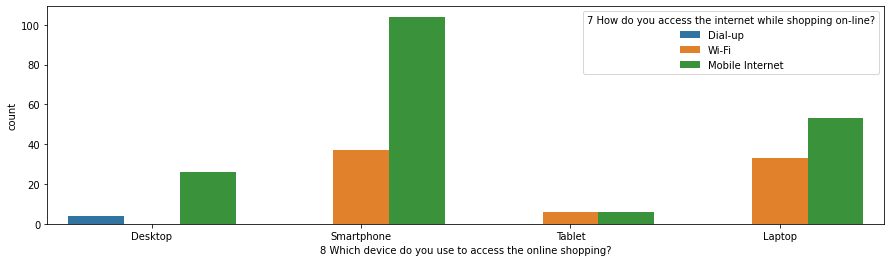

In [30]:
plt.figure(figsize=(15,4),facecolor='white')
sns.countplot(df['8 Which device do you use to access the online shopping?'], hue=df['7 How do you access the internet while shopping on-line?'])

<AxesSubplot:xlabel='9 What is the screen size of your mobile device?', ylabel='count'>

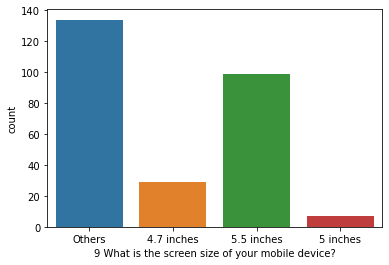

In [31]:
sns.countplot(df['9 What is the screen size of your mobile device?'])

<AxesSubplot:xlabel='8 Which device do you use to access the online shopping?', ylabel='count'>

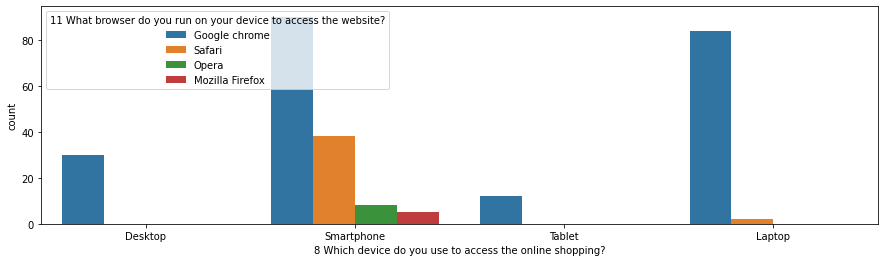

In [32]:
plt.figure(figsize=(15,4),facecolor='white')
sns.countplot(df['8 Which device do you use to access the online shopping?'], hue=df['11 What browser do you run on your device to access the website?'])

- These are the observations of the devices which are using the browser
- Desktop:
    * Chrome is the only browser used by users in desktop
- Smartphone:
    * smartphone user uses all browsers
- Tablet:
    * Chrome is used by users
- Laptop:
    * Chrome and safari are used by users

<AxesSubplot:xlabel='12 Which channel did you follow to arrive at your favorite online store for the first time?', ylabel='count'>

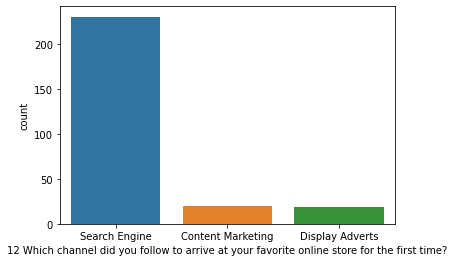

In [33]:
sns.countplot(df['12 Which channel did you follow to arrive at your favorite online store for the first time?'])

- To arrive to your favorite online store most of the people has used Search Engine

<AxesSubplot:xlabel='13 After first visit, how do you reach the online retail store?', ylabel='count'>

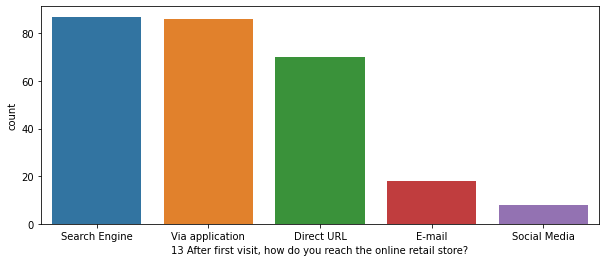

In [34]:
plt.figure(figsize=(10,4),facecolor='white')
sns.countplot(df['13 After first visit, how do you reach the online retail store?'])

- Mostly after first visit the users has reached the online retail store using 'Search Engine','Via application'.
- Moderatly Users has visited using 'Direct URL'.
- In the very less times Users used 'E-mail','Social Media'

<AxesSubplot:xlabel='14 How much time do you explore the e- retail store before making a purchase decision?', ylabel='count'>

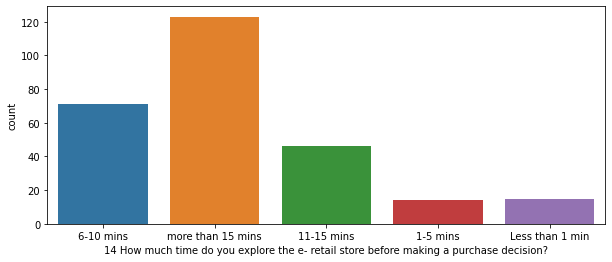

In [35]:
plt.figure(figsize=(10,4),facecolor='white')
sns.countplot(df['14 How much time do you explore the e- retail store before making a purchase decision?'])

- Most of the users spent more than 15 mins before making a purchase
- least time spent is 1-5 mins or less than 1 min

<AxesSubplot:xlabel='15 What is your preferred payment Option?', ylabel='count'>

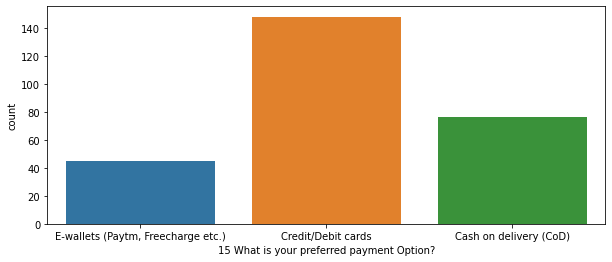

In [36]:
plt.figure(figsize=(10,4),facecolor='white')
sns.countplot(df['15 What is your preferred payment Option?'])

- Most of the users used Credit/Debit cards as prefered payment method 

<AxesSubplot:xlabel='16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?', ylabel='count'>

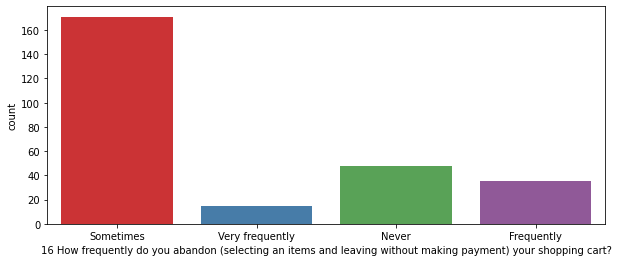

In [37]:
plt.figure(figsize=(10,4),facecolor='white')
sns.countplot(df['16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?'], palette="Set1") 

- Sometimes has the most high number for abadon the shopping cart

#### Lets see the data in graphical view for the rating given by the customer

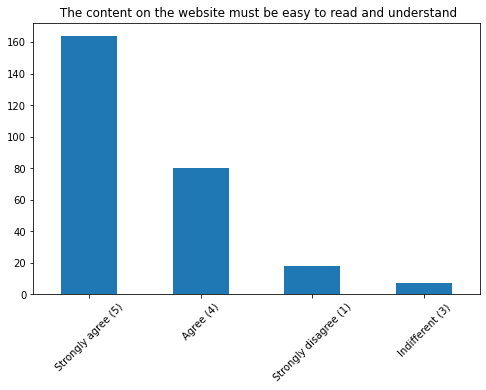

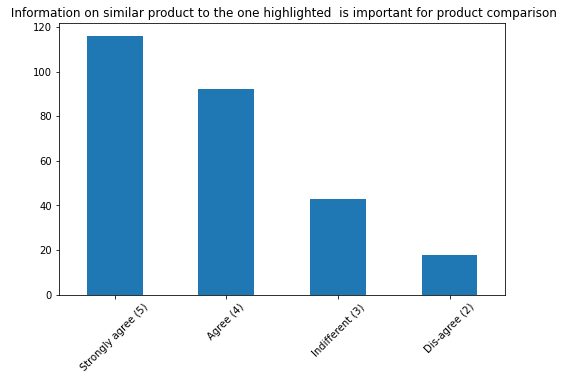

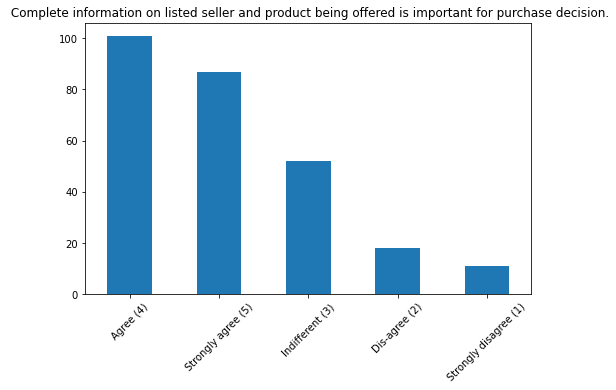

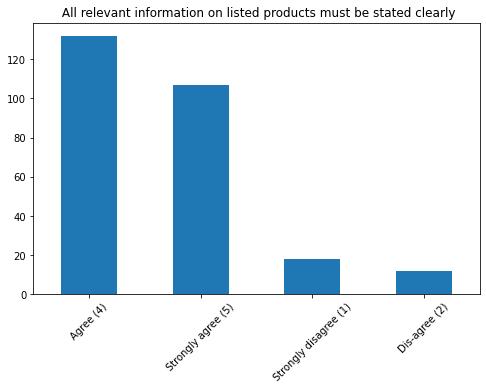

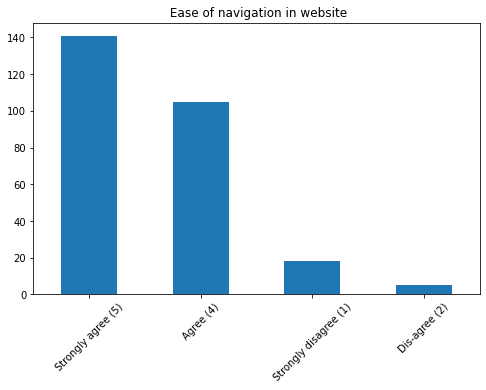

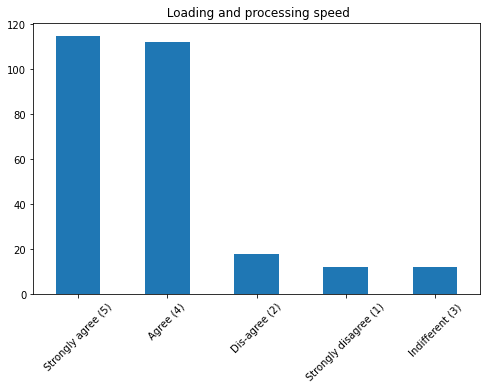

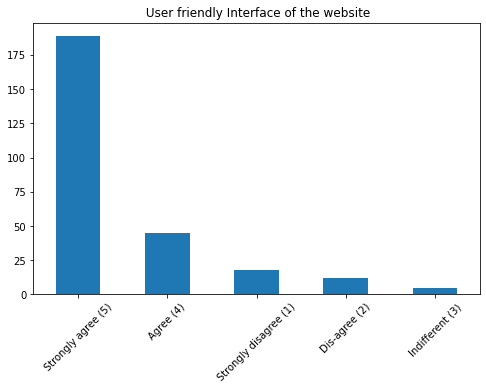

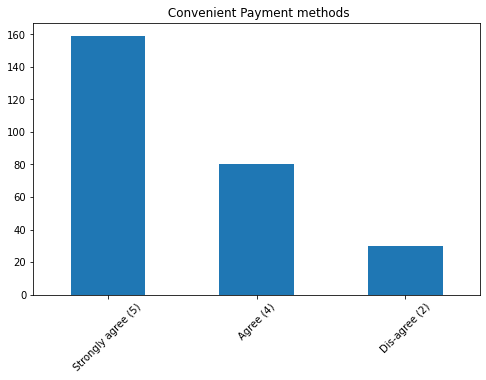

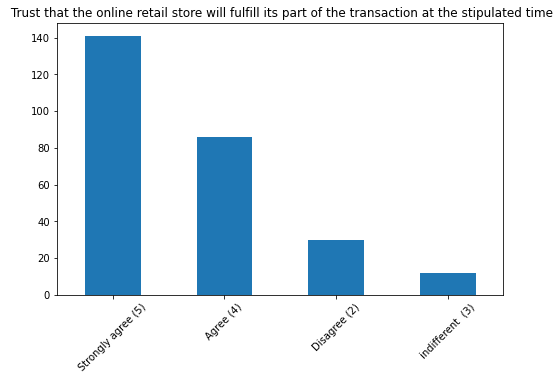

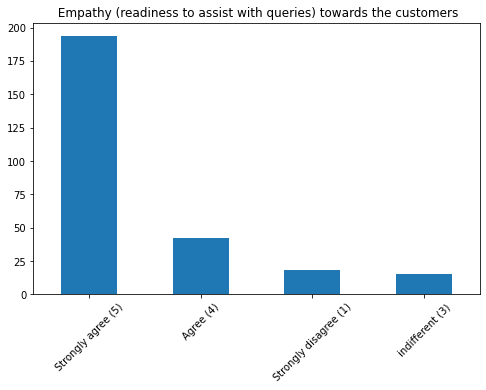

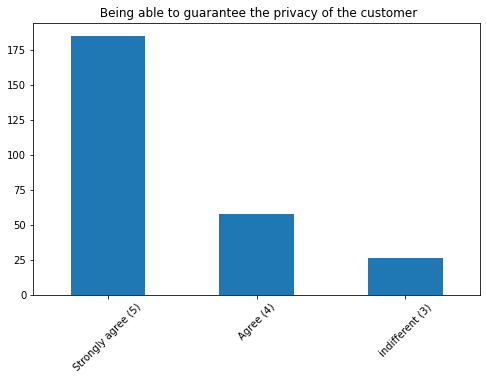

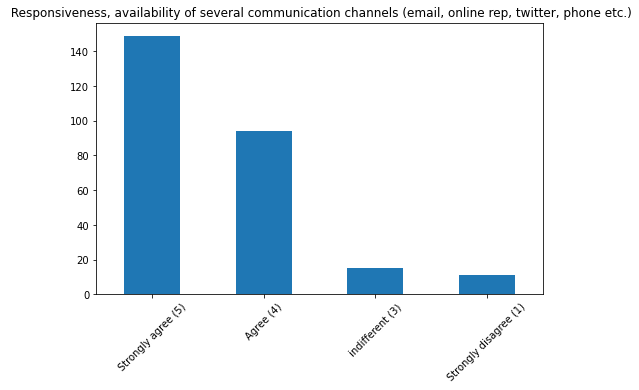

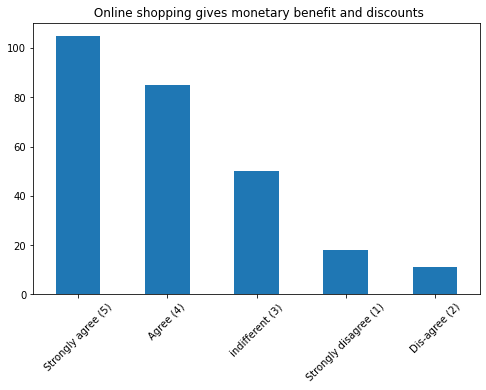

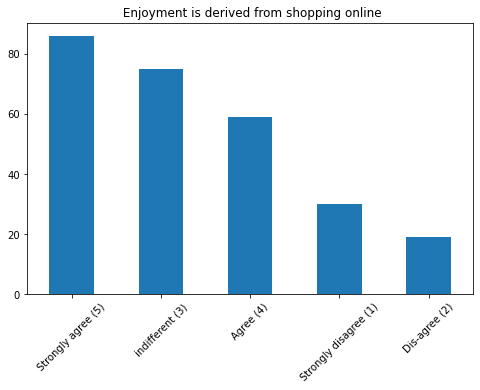

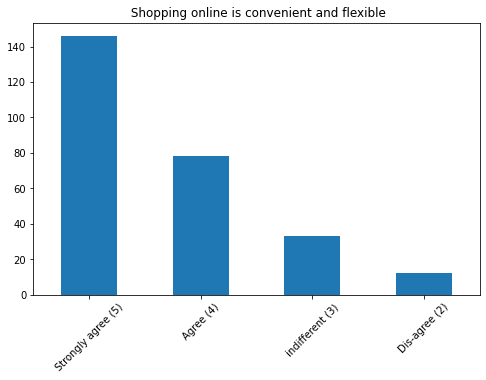

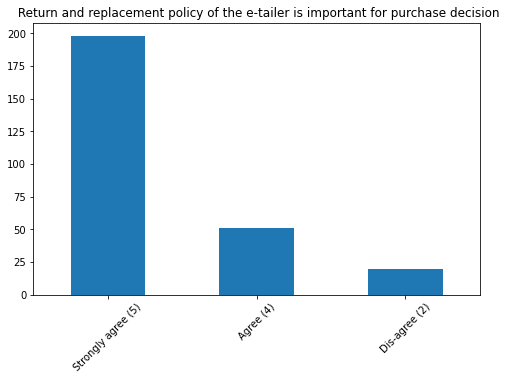

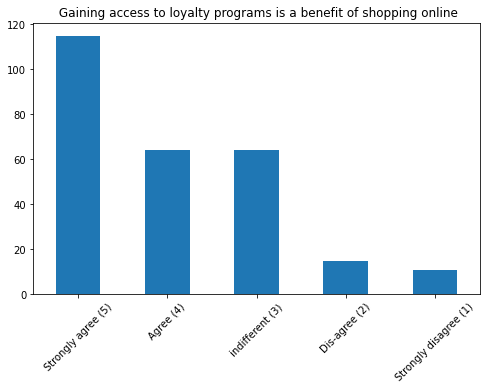

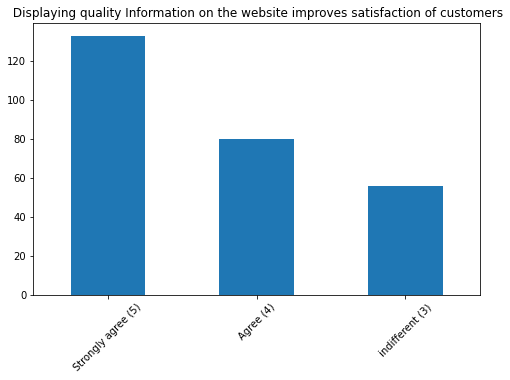

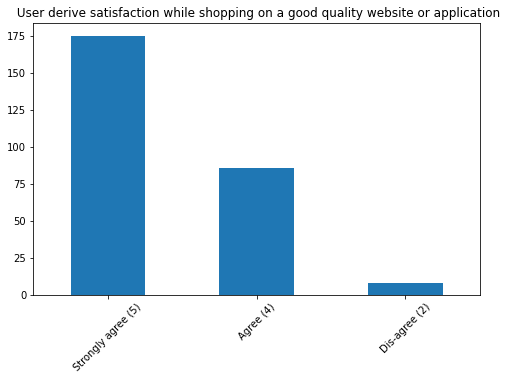

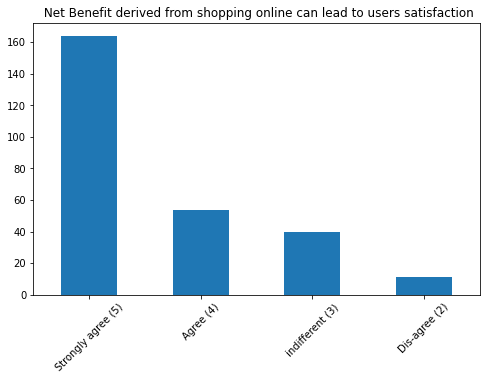

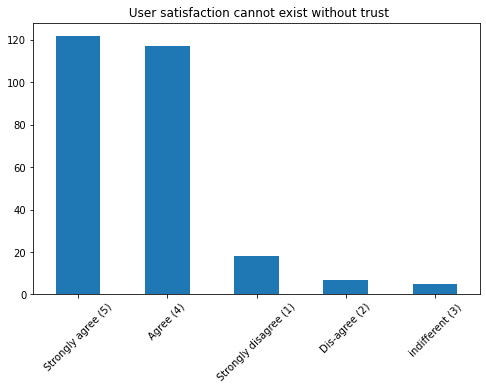

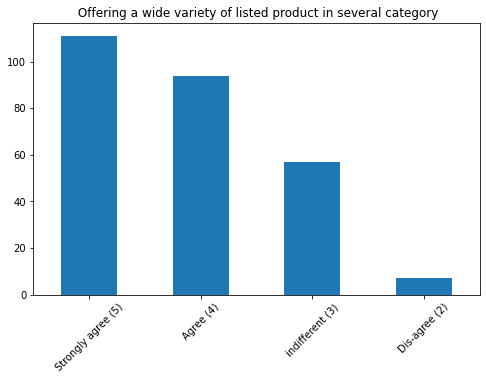

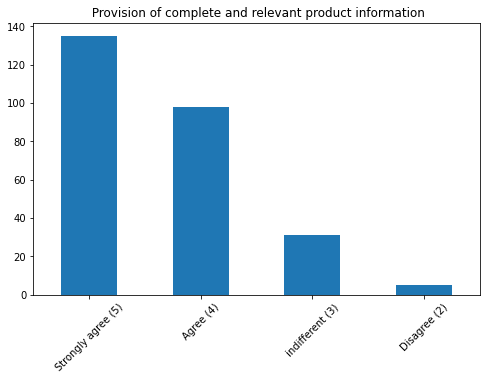

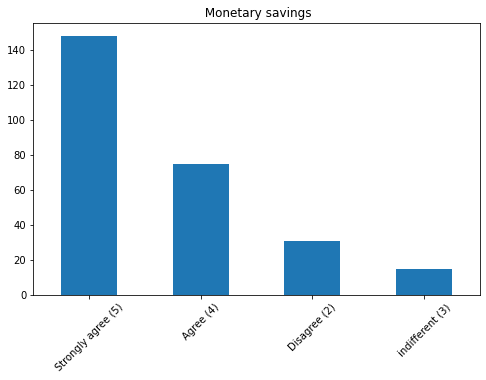

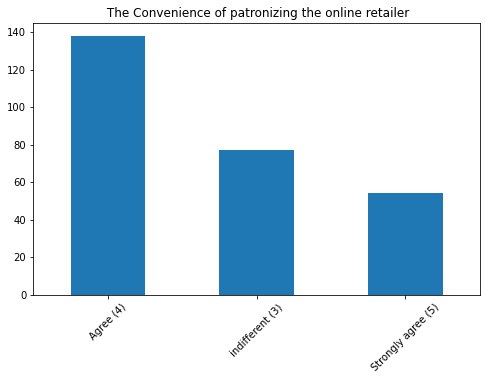

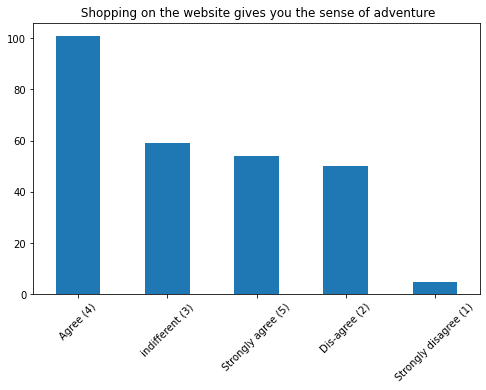

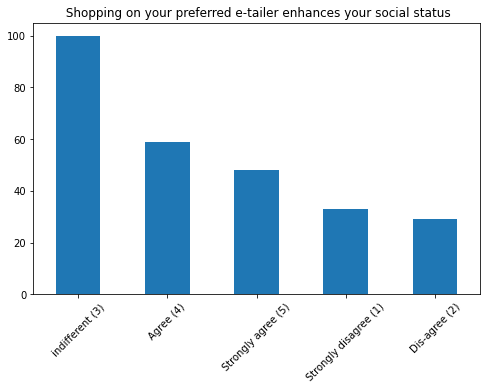

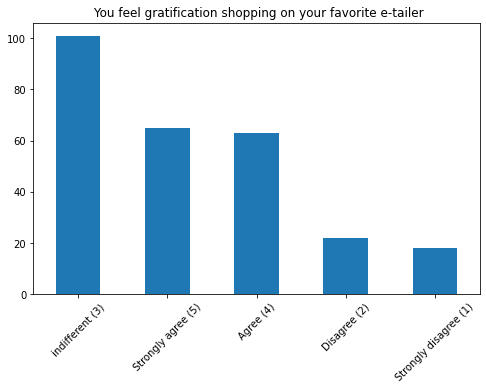

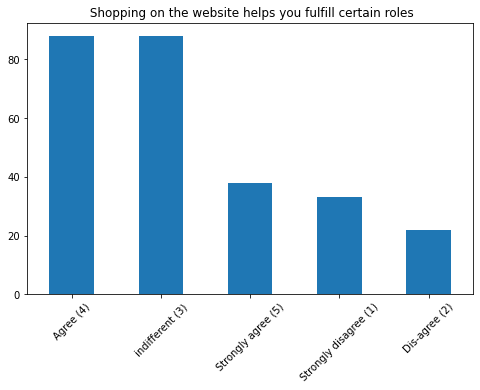

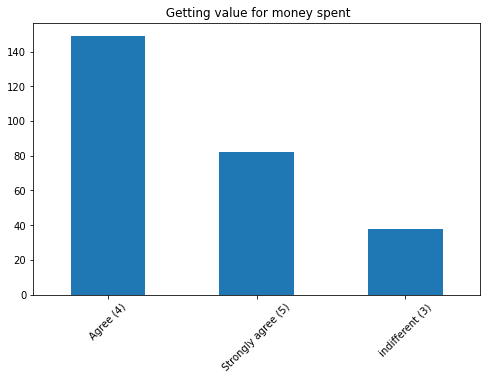

In [38]:
services_ratings=df.iloc[:,17:47]             # Sevices of customer
for features in services_ratings:
    fig=plt.figure(figsize=(8,5))
    df[features].value_counts().plot(kind='bar')
    plt.xticks(rotation=45)
    plt.title(features[2:])
    plt.show()

- The content in the website must be easy to understand is what most of the users are strongly agreeing with you
- Mostly customer are satisfied with information on similiar product to the one highlighted is important for product comparision. No matter what are their ages.
- Customers are satisfied with relevant information on listed seller and product being offered is important for purchase decision
- Customer are satisfied with the relevant information of products must be stated clearly.
- Customers satisfied with the navigation feature produced by website.
- Customers are mostly satisfied with the performance of the website.
- most of the customers are very much satisfied with the website's user-friendliness.
- Mostly users are satiesfied with the payments Services.
- Customer has the good trust built between the customers and the onlineRetailers stores that they fulfill its part of transaction at the stipulated time.
- Mostly customers are satisfied with the Empathy (The way service executives respond for queries).
- Most of the customers are haighly satisfied with the oath that company is able to gurantee the privacy of the customer
- Most of Customer are satisfied with responsiveness, availibility of of several communication channels.
- Customers are strongly agreeing with the monetary benefits and discounts in online.
- Mostly half of the customers are not satisfied with enjoyment service from online shopping
- Most of the customers opinion is like they are convenienet and flexible with online shopping mode.
- Most of the customers opinion is like Return & replacement policy services.
- Users are strongly agrreeing with gaining the access to loyality program is benefit.
- Customers are highly satisfied with quality information on websites.
- Customer are highly satisfied with the good quality of websites or application.
- Mostly customers getting Net Benefit derived from shopping online.
- Most of users are agreeing with the word user satisfaction cannot exist with out trust.
- Mostly customer are satisfied with the service offering wide variety to customers.
- Users are satisfied with the provision of complete and relevant product information.
- Customers are highly satisfied with monetary savings
- Mostly customer are not satisfied with the convinience of patronizing the online reatiler.
- Mostly customer doesn't feels adventure while using websites. 
- Most Users feels indiiferent while shopping online there is not such enhancement on their social status.
- Users opinion is indifferent in gratification shopping on your favourite e-trailer.
- Mostly customer doesn't feels helpful that shopping fulfil their certain roles.
- Customers are getting highly satisfied for the money spent in online shopping

<AxesSubplot:xlabel='count', ylabel='From the following, tick any (or all) of the online retailers you have shopped from;'>

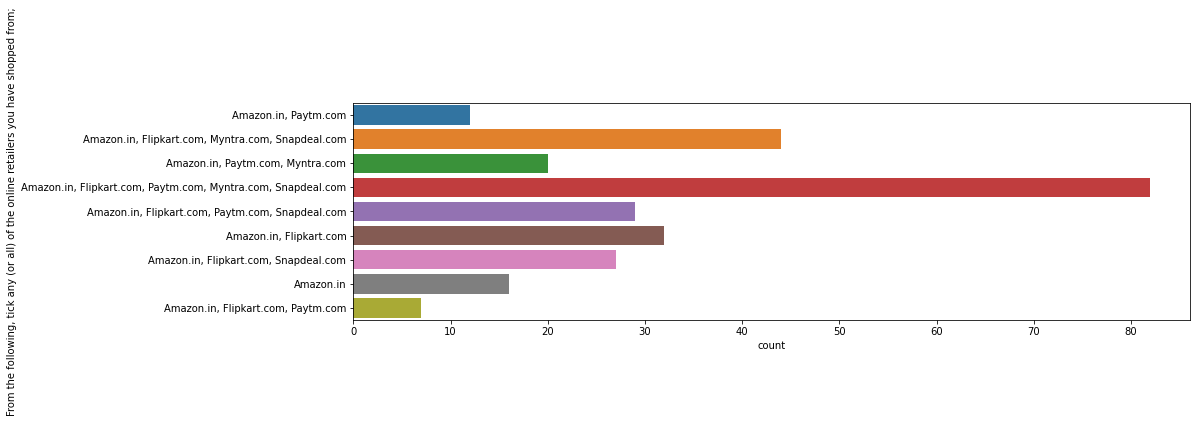

In [39]:
plt.figure(figsize=(15,4),facecolor='white')
sns.countplot(y="From the following, tick any (or all) of the online retailers you have shopped from;", data=df)

- Most of the people are using all the sites for online shopping

#### Comparing the usage of online retailers in specific city

<AxesSubplot:xlabel='3 Which city do you shop online from?'>

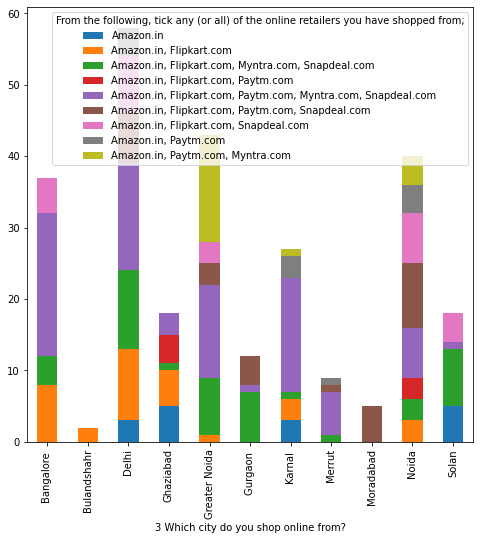

In [40]:
clarity_color_table = pd.crosstab(index=df["3 Which city do you shop online from?"], 
                          columns=df["From the following, tick any (or all) of the online retailers you have shopped from;"])
clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

- Bangalore customers uses mostly all online retailer web-sites.
- Bulandshahr Customers that too little amount of people uses Amazon.in and Flipkart.com.
- Delhi Customers also uses all the online retailer websites.
- In Ghaziabad only some amount of people only uses all sites,most of the people uses Amazon.in,FlipKart.com.
- Greater Noida, Noida Customers also uses all sites with different ages people.
- Gurgaon Customers mostly uses only amazon,flipkart,myntra,snapdeal.
- Kamal area most of the users uses all websites.
- Merut area only some amount of users uses all websites
- Moradabad customers mostly visted sites are amazon,flipkart,paytm,snapdeal.
- Solan customers mostly visited amazon,flipkart,myntra,snapdeal.

<AxesSubplot:xlabel='count', ylabel='Easy to use website or application'>

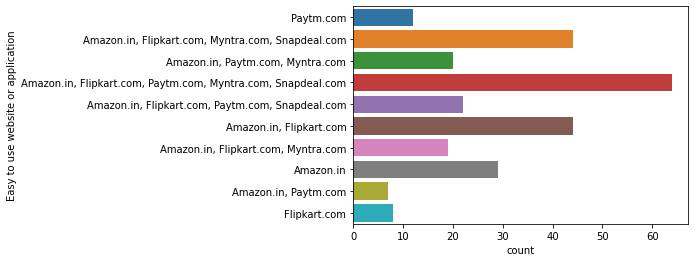

In [41]:
sns.countplot(y = 'Easy to use website or application',data=df)

- most of the customers opinion is Amazon,FlipKart,Paytm,Myntra,Snapdeal applications are ease to use

In [42]:
#A separate dataframe for displaying the positive feedback
onlineReatilers=df.iloc[:,47:]        # Online retailers feedback by customer details.
pos_feedback_for_website=onlineReatilers.drop(["Longer time to get logged in (promotion, sales period)",
                   "Longer time in displaying graphics and photos (promotion, sales period)",
                   "Late declaration of price (promotion, sales period)",
                   "Longer page loading time (promotion, sales period)",
                   "Limited mode of payment on most products (promotion, sales period)",
                   "Longer delivery period", "Frequent disruption when moving from one page to another"], axis=1)
pos_feedback_for_website.head(2)

,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness ato complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,Change in website/Application design,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,Amazon.in,Amazon.in,Flipkart.com,Paytm.com,Flipkart.com,Amazon.in,Flipkart.com
1,"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Myntra.com","Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com",Myntra.com,"Amazon.com, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Myntra.com",Amazon.in,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"


In [43]:
#Analysing the positive feedback
website_list=['Amazon.in','Flipkart.com','Paytm.com','Myntra.com','Snapdeal.com']  #Website list
col_names=[]   #Empty list for column names
websites=[]    #Empty list for websites
count=[]       #Empty list for checking the count of customer present to websites are mentioned

for col in pos_feedback_for_website.columns:
    for i in website_list:
        present=len(pos_feedback_for_website[pos_feedback_for_website[col].str.contains(i)])  #Checking if websites in dataframe are available in the website list 
        col_names.append(col)   #Appending the column names
        websites.append(i)    #Appending the website names
        count.append(present) #Appending the count of customer at website present in feedback

#Creating positive feedback dataframe
positive_df=pd.DataFrame([col_names,websites,count],index=["columnsName","websites","customerCount"]).T
positive_df

,columnsName,websites,customerCount
0,"From the following, tick any (or all) of the o...",Amazon.in,269
1,"From the following, tick any (or all) of the o...",Flipkart.com,221
2,"From the following, tick any (or all) of the o...",Paytm.com,150
3,"From the following, tick any (or all) of the o...",Myntra.com,146
4,"From the following, tick any (or all) of the o...",Snapdeal.com,182
...,...,...,...
80,Which of the Indian online retailer would you ...,Amazon.in,219
81,Which of the Indian online retailer would you ...,Flipkart.com,127
82,Which of the Indian online retailer would you ...,Paytm.com,44
83,Which of the Indian online retailer would you ...,Myntra.com,76


<AxesSubplot:xlabel='websites', ylabel='customerCount'>

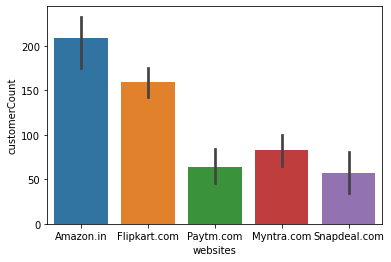

In [44]:
#Plotting barplot for people_count vs website relationship
sns.barplot(x='websites',y='customerCount',data=positive_df)

- As we can see the Amazon has the mostly postive feedback compared to all other websites for various reasons
- Flipkart takes second position
- Myntra takes third ranking 
- Paytm takes 4th ranking
- Snapdeal takes last position in getting positive feedback with various reasons

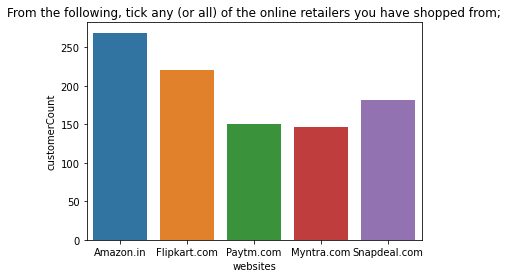

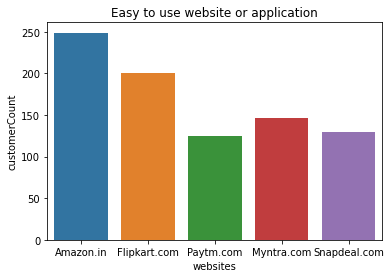

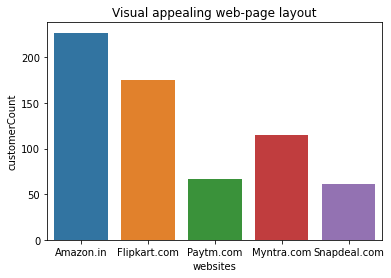

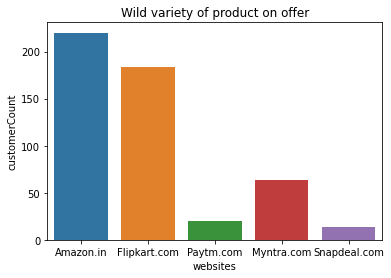

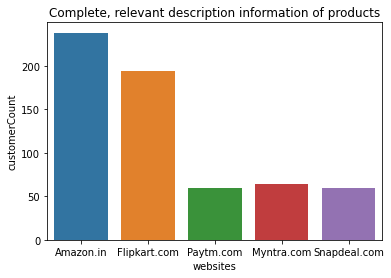

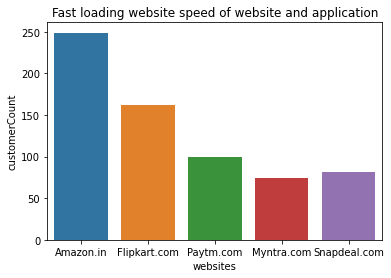

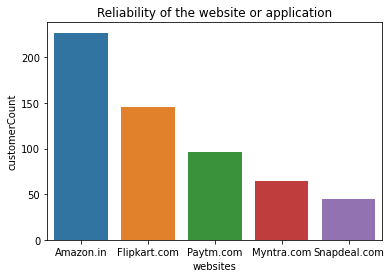

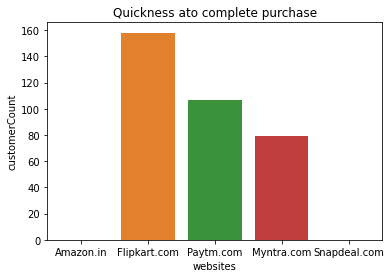

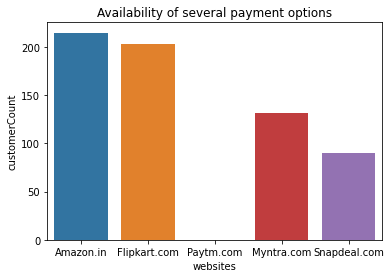

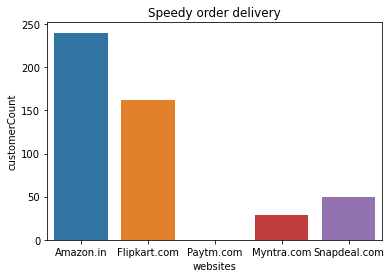

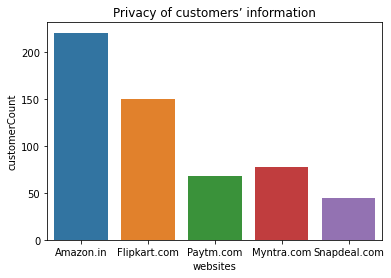

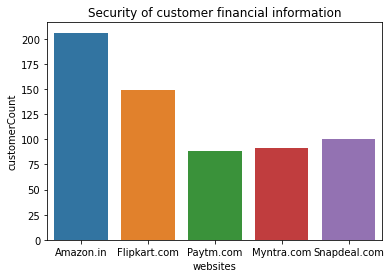

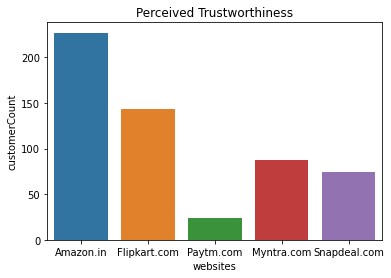

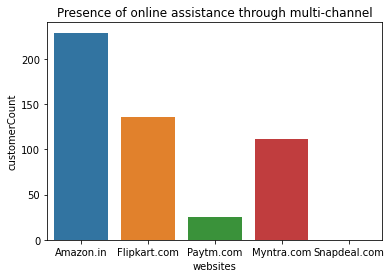

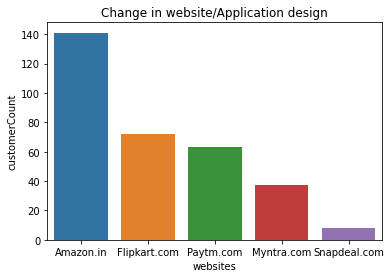

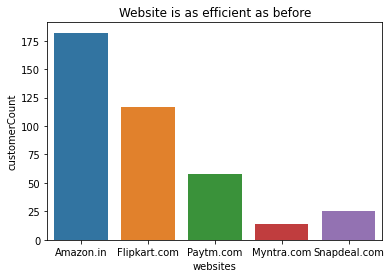

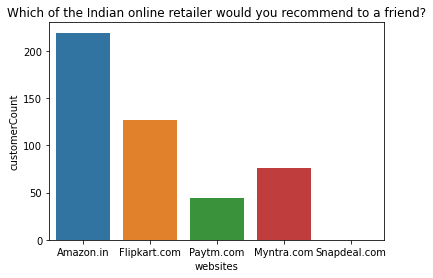

In [45]:
#Extracting feature wise comparison from positive feedback dataframe and plotting the data using pie chart
positive_data_range=range(0,81,5) # iam taking range from 0-85 because we have count of 85 in postivie DF(17*5)
#Extracting feature wise comparison from positive feedback dataframe and plotting bar plot
for i in positive_data_range:
    a=positive_df.iloc[i:i+5,:]
    sns.barplot(x='websites',y='customerCount',data=a)
    plt.title(a['columnsName'][i])
    plt.show()
    print("\n")

##### Observations
- online retailer sites customers has shopped from
    * when survey asked to tick/select for online retailers you have shopped for most of the users said that they have shopped from Amazon site.
    * Less count goes for paytm and Myntra .
    * 2nd and 3rd postion goes to FlipKart and Snapdeal in mostly users shopped from.
- Easy to use web-application
    * Amazon ranks first in ease of its website.
    * Paytm has been not good in its usability for its users is what dataset is speaking about.
    * FlipKart followed by Myntra, SnapDeal in the ease of the website.
- Visual appeleaing web-page layout
    * Amazon has good rankings/votes in the web page Interface.
    * Flipkart followed by myntra has nxt good opinion in Interface of the site
    * Users doesn't have good opinion for the website Interface for Paytm and Snapdeal 
- Wild variety of product on offer
    * As per Users view Amazon and Flipkart are providing good offers on the products
- Complete, relevant description information of products
    * Customers has a opinion like Amazon and FlipKart are providing the ample amount of Product Description
    * Very less customers has good opinion on Paytm,Myntra, Snapdeal on description provided by sites for the products
- Fast loading website speed of website and application
    * Users has opinion on Amazon followed by Flipkart,Paytm,Snapdeal,Myntra on the performance of teh website
- Reliability of the website or application
    * As per Customers Opinion the relaibility of the Amazon website is Excellent
    * Then comes Flipkart,Paytm,Myntra, Snapdeal
- Quickness to complete purchase
    * Flipkart ranked high  in the quickness of the purchase completion
    * Amazon has no data for quickness of the purchase completion
    * Myntra Scores last place according to customers on quickness of the purchase completion
- Availability of several payment options
    * Amazon and Flipkart are having several payment methods compared to Myntra and Snapdeal
    * There is no data for Paytm
- Speedy order delivery 
    * Amazon is having the Speedy delivery of the products
    * Flikart followed by snapdeal,myntra has the other rankings on speedy delivery of products
- Privacy of customers’ information
    * Amazon is maintaining high privacy of the customers inforamtion compared to other online retailers.
- Security of customer financial information
    * Amazon is providing good security of customers financial information
    * Paytm,Myntra,Snapdeal are providing less security compared to Amazon
- Perceived Trustworthiness
    * Amazon has good Trust among the customers
    * Paytm has less trust among the customers
- Presence of online assistance through multi-channel
    * Amazon is providing excellent Presence of online assistance through multi-channel
    * Paytm is providing Bad Prrsence Presence of online assistance through multi-channel
- Website is as efficient as before
    * Amazon is having good efficiency
    * Data says myntra is having less efficiency
- Which of the Indian online retailer would you recommend to a friend?
    * Most of the customers are saying they would recommend Amazon to their friends

In [46]:
neg_feedback_for_website = onlineReatilers[["Longer time to get logged in (promotion, sales period)",
                   "Longer time in displaying graphics and photos (promotion, sales period)",
                   "Late declaration of price (promotion, sales period)",
                   "Longer page loading time (promotion, sales period)",
                   "Limited mode of payment on most products (promotion, sales period)",
                   "Longer delivery period", "Frequent disruption when moving from one page to another"]]
neg_feedback_for_website.head(2)

,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Frequent disruption when moving from one page to another
0,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Amazon.in
1,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Myntra.com


In [47]:
#Analysing the negative feedbacks separately
website_list=['Amazon.in','Flipkart.com','Paytm.com','Myntra.com','Snapdeal.com']  #Website list
col_names=[]   #Empty list for column names
websites=[]    #Empty list for websites
count=[]       #Empty list for checking the count of no of times the websites are mentioned

for col in neg_feedback_for_website.columns:
    for i in website_list:
        present=len(neg_feedback_for_website[neg_feedback_for_website[col].str.contains(i)])  #Checking if websites in dataframe are available in the website list 
        col_names.append(col)   #Appending the column names
        websites.append(i)    #Appending the website names
        count.append(present) #Appending the count of customer at website present in feedback

In [48]:
#Creating negative feedback dataframe
negative_df=pd.DataFrame([col_names,websites,count],index=["columnsName","websites","customerCount"]).T
negative_df

,columnsName,websites,customerCount
0,"Longer time to get logged in (promotion, sales...",Amazon.in,135
1,"Longer time to get logged in (promotion, sales...",Flipkart.com,103
2,"Longer time to get logged in (promotion, sales...",Paytm.com,77
3,"Longer time to get logged in (promotion, sales...",Myntra.com,35
4,"Longer time to get logged in (promotion, sales...",Snapdeal.com,67
5,Longer time in displaying graphics and photos ...,Amazon.in,126
6,Longer time in displaying graphics and photos ...,Flipkart.com,94
7,Longer time in displaying graphics and photos ...,Paytm.com,28
8,Longer time in displaying graphics and photos ...,Myntra.com,74
9,Longer time in displaying graphics and photos ...,Snapdeal.com,92


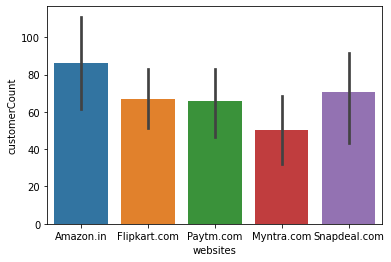

In [49]:
#Plotting barplot for people_count vs website relationship
sns.barplot(x='websites',y='customerCount',data=negative_df)
plt.show()

- As per the graph amazon is having more negative rate
- We can note that difference between negative feedbacks of the websites is not very huge and it needs to be improved in order to handle such situations.

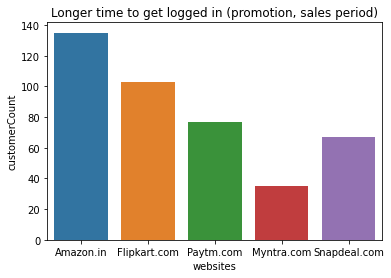

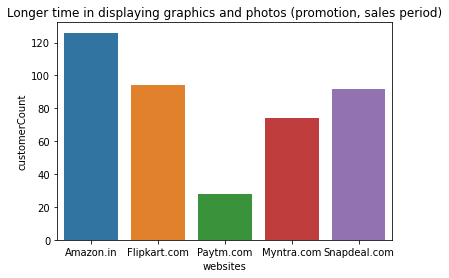

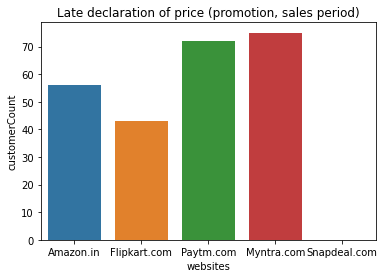

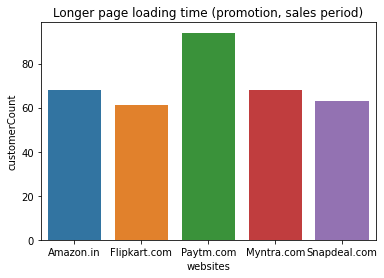

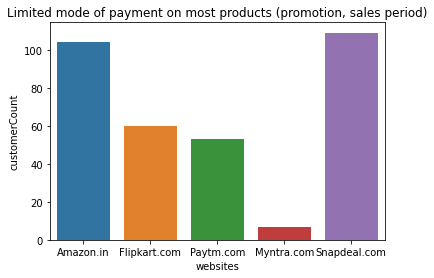

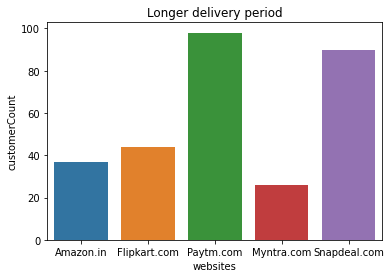

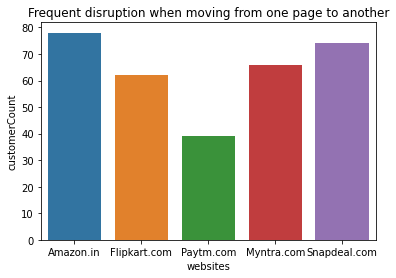

In [50]:
#Extracting feature wise comparison from positive feedback dataframe and plotting the data using pie cha
negative_data_range=range(0,35,5) # iam taking range from 0-35 because we have count of 35 in postivie DF(7*5)
#Extracting feature wise comparison from positive feedback dataframe and plotting bar plot
try:
    for i in positive_data_range:
        a=negative_df.iloc[i:i+5,:]
        sns.barplot(x='websites',y='customerCount',data=a)
        plt.title(a['columnsName'][i])
        plt.show()
        print("\n")
except ValueError:
    pass

##### Observations
- Longer time to get logged in (promotion, sales period)
    * Customers are Not satisfied with Amazon on the time taken for customer log in followed by Flipkart,paytm,snapdeal
    * Myntra Takes very long time for customer account login 
- Longer time in displaying graphics and photos (promotion, sales period)
    * As per customer Amazon is taking longer time to load
    * Paytm takes very less time in loading the graphics
- Late declaration of price (promotion, sales period)
    * Paytm,Myntra is making the late declaration of price
    * Compared to Flipkart amazon is making the Late declaration of price
- Longer page loading time (promotion, sales period)
    * Paytm is taking long time to page loading
    * Amazon and Flikart has good page loading 
- Limited mode of payment on most products (promotion, sales period)
    * snapdeal has the limited mode payment on most products
    * Although Amazon has many payments methods for some of the products it has limited payment methods
    * Myntra has good amount of payment modes
- Longer delivery period
    * Customer says paytm is taking the longer delivery period to deliver products
    * Amazon has good delivery speed
    * Some of the customers are saying Myntra has good delivery speed and some are saying it takes long to deliver
- Frequent disruption when moving from one page to another
    * Amazon, Snapdeal and Myntra have frequent discrepencies, when moving from one page to another

### Conclusion

- Amazon:
    * Needs to be improved in customers login.
    * Need to give a disturbance free shopping experience to customers. 
    * Amazon should provide some more payment options
    * Good Presence of online assistance through multi-channels
    * Good Reliable website
    * ease of its website
    * Excellent Visual appeleaing web-page layout
    * Good Wild variety of product on offer
    * provides Complete, relevant description information of products
    * Delivers Order Quickly
    * Provides Privacy of customers’ information

- FlipKart:
    * Mostly Amazon and Flipkart has same feedback info for the websites
    * try to give a disturbance free shopping experience to customers
    * Reduce the delivery time of the products
    * Give more payment options to customers
    * Try to give the price early during promotion
    * Wild variety of product on offer
    * Convenient to use and also a good website for shopping
    * Fast delivery of products
    * Excellent Availability of complete information of the products
    * Presence of online assistance through multi-channels
    * Good Reliable website 
    * perceived trustworthiness

- Myntra:
    * Try to give the price early
    * Reduce the delivery time of the products during promotions
    * provides Availability of several payment options
    * Provides faster delivery of products
    * Provides complete information of products
    * Wild variety of product to offer

- Paytm.com
    * Try to give the price early during promotion
    * Need to provide disturbance free shopping experience to customers
    * Reduce the delivery time of the products during promotions
    * Late declaration of price and discounts
    * Frequent disturbance is occurring while moving from one page to another
    * Quickness to complete a purchase
    * some customers feel web is reliable and some feel app is reliable
    * wild variety of products on offer

- Snapdeal:
    * Need to avoid Late declaration of price and discounts
    * Most of the customers has expressed to not to recommend snapdeal to a contact as it has the most negative feedbacks among all other websites
    * Reduce the delivery time of the products during promotion
    * Need to give the price early
    * Need to provide disturbance free shopping experience to customers

In [51]:
!pip install dtale

In [52]:
import dtale
dtale.show(df)